<a href="https://colab.research.google.com/github/anicelysantos/book-python-para-analise-de-dados/blob/main/series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Estudos do livro "Python para análise de dados" cap. 11*

# **Imports**

In [172]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.offsets import Hour
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

# **Tipos de dados e ferramentas para data e hora**

In [2]:
now = datetime.now()
now

datetime.datetime(2021, 9, 29, 14, 42, 13, 469784)

In [3]:
#now.year, now.month, now.day
now.day, now.month, now.year

(29, 9, 2021)

In [4]:
#import lá em cima timedelta
#timedelta mostra a diferença de tempo entre dois objetos datetime

delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

In [7]:
start = datetime(2011,1,7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)


datetime.datetime(2010, 12, 14, 0, 0)

**Conversão entre string e datetime**

In [9]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [10]:
#stamp.strftime('%Y-%m-%d')
stamp.strftime('%F') #mesma coisa de cima

'2011-01-03'

In [11]:
value = '2011-01-03'

In [12]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
datestrs = ['9/19/2021','9/20/2020']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2021, 9, 19, 0, 0), datetime.datetime(2020, 9, 20, 0, 0)]

In [14]:
#Import do parse lá no inicio
parse('21-09-2021')

datetime.datetime(2021, 9, 21, 0, 0)

In [15]:
parse('Sep 21, 2021 09:02 AM')

datetime.datetime(2021, 9, 21, 9, 2)

In [16]:
#Dia antes do mês, padrão Brasil
parse('21/09/2021', dayfirst=True)

datetime.datetime(2021, 9, 21, 0, 0)

In [17]:
datastrs = ['2021-09-21 09:04:00', '2021-09-21 09:05:00']
pd.to_datetime(datastrs)

DatetimeIndex(['2021-09-21 09:04:00', '2021-09-21 09:05:00'], dtype='datetime64[ns]', freq=None)

In [18]:
#Lidar com dados ausentes (None)
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2021-09-19', '2020-09-20', 'NaT'], dtype='datetime64[ns]', freq=None)

In [19]:
#NaT é o valor nulo do pandas para tempo/data (dados de timestamp)
idx[2]

NaT

In [20]:
pd.isnull(idx)

array([False, False,  True])

# **Básico sobre séries temporais**

In [21]:
#import datetime no inicio
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011,1,10), datetime(2011, 1, 12)]

In [22]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -1.933076
2011-01-05   -1.452877
2011-01-07    1.622719
2011-01-08   -1.211010
2011-01-10    3.025180
2011-01-12   -0.942912
dtype: float64

In [23]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [24]:
#[::2]seleciona um elemento a cada dois
ts + ts[::2]

2011-01-02   -3.866152
2011-01-05         NaN
2011-01-07    3.245439
2011-01-08         NaN
2011-01-10    6.050360
2011-01-12         NaN
dtype: float64

In [25]:
ts.index.dtype

dtype('<M8[ns]')

In [26]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

**Indexação, seleção e geração de subconjuntos**

In [27]:
stamp = ts.index[2]
ts[stamp]

1.6227192721434964

In [28]:
#Passar uma string para ser interpretada como data
ts['1/10/2011']

3.0251798442829108

In [29]:
ts['20110110']

3.0251798442829108

In [30]:
#series temporais mais longas podem selecionar o ano ou só o ano e o mês para trazer trechos do dataframe
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.385550
2000-01-02    1.571313
2000-01-03   -0.831440
2000-01-04    1.463855
2000-01-05   -1.190571
                ...   
2002-09-22    0.885115
2002-09-23   -1.181237
2002-09-24    1.479000
2002-09-25    0.886168
2002-09-26   -1.795715
Freq: D, Length: 1000, dtype: float64

In [31]:
longer_ts['2001']

2001-01-01   -0.412933
2001-01-02    1.885075
2001-01-03    0.830931
2001-01-04   -1.034637
2001-01-05   -1.450781
                ...   
2001-12-27    1.772479
2001-12-28   -1.438299
2001-12-29    0.351677
2001-12-30    0.612232
2001-12-31   -0.389150
Freq: D, Length: 365, dtype: float64

In [32]:
longer_ts['2001-05']

2001-05-01   -0.682597
2001-05-02   -0.203115
2001-05-03    0.444531
2001-05-04   -0.274121
2001-05-05   -0.937856
2001-05-06   -0.371209
2001-05-07   -0.033181
2001-05-08    0.696940
2001-05-09    0.679200
2001-05-10   -0.342100
2001-05-11   -1.070655
2001-05-12    1.205764
2001-05-13   -0.541569
2001-05-14    0.860089
2001-05-15    1.446006
2001-05-16    0.243759
2001-05-17    1.318241
2001-05-18    1.322726
2001-05-19    0.383467
2001-05-20    1.108182
2001-05-21   -0.353843
2001-05-22   -0.103702
2001-05-23    0.777501
2001-05-24   -0.175938
2001-05-25   -0.079864
2001-05-26    0.489460
2001-05-27   -0.851276
2001-05-28    0.663445
2001-05-29   -0.861190
2001-05-30   -3.808455
2001-05-31    0.001024
Freq: D, dtype: float64

In [33]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.622719
2011-01-08   -1.211010
2011-01-10    3.025180
2011-01-12   -0.942912
dtype: float64

In [34]:
ts

2011-01-02   -1.933076
2011-01-05   -1.452877
2011-01-07    1.622719
2011-01-08   -1.211010
2011-01-10    3.025180
2011-01-12   -0.942912
dtype: float64

In [35]:
ts['1/6/2011':'1/11/2011']

2011-01-07    1.622719
2011-01-08   -1.211010
2011-01-10    3.025180
dtype: float64

In [36]:
#Fatiar um periodo entre duas datas
ts.truncate(after='1/9/2011')

2011-01-02   -1.933076
2011-01-05   -1.452877
2011-01-07    1.622719
2011-01-08   -1.211010
dtype: float64

In [37]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100,4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [38]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.492200,-0.201204,1.464712,-2.268789
2001-05-09,-0.969609,-1.394170,-2.324482,1.489545
2001-05-16,-1.248067,-0.979309,-1.211770,0.091756
2001-05-23,-1.119556,0.947442,0.163072,-0.443417
2001-05-30,-0.553086,-1.028214,-0.284450,-0.259256


**Séries temporais com índices duplicados**

In [39]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)

In [40]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [41]:
dup_ts.index.is_unique

False

In [42]:
dup_ts['1/3/2000']

4

In [43]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [44]:
#agregar os dados únicos
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [45]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# **Intervalos de datas, frequências e deslocamentos**

In [46]:
ts

2011-01-02   -1.933076
2011-01-05   -1.452877
2011-01-07    1.622719
2011-01-08   -1.211010
2011-01-10    3.025180
2011-01-12   -0.942912
dtype: float64

In [47]:
#String 'D' é o equivalente a frequência diária
resampler = ts.resample('D')


**Gerando intervalos de datas**

In [48]:
#pandas.date_range gera index com tamanho especifico
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [49]:
#Se passar só a data do inicio ou do fim, precisa passar o periodo
pd.date_range(start='2021-08-01', periods=20)

DatetimeIndex(['2021-08-01', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08',
               '2021-08-09', '2021-08-10', '2021-08-11', '2021-08-12',
               '2021-08-13', '2021-08-14', '2021-08-15', '2021-08-16',
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range(end='2021-09-01', periods=20)

DatetimeIndex(['2021-08-13', '2021-08-14', '2021-08-15', '2021-08-16',
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
               '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', freq='D')

In [51]:
#'BM' trás um trecho de data contendo o ultimo dia útil de cada mês
pd.date_range('2020-01-01','2021-01-01', freq='BM')

DatetimeIndex(['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='BM')

In [52]:
pd.date_range('2021-07-03 12:56:31', periods=5)

DatetimeIndex(['2021-07-03 12:56:31', '2021-07-04 12:56:31',
               '2021-07-05 12:56:31', '2021-07-06 12:56:31',
               '2021-07-07 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [53]:
#normalizar horários com normalize
pd.date_range('2021-08-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06'],
              dtype='datetime64[ns]', freq='D')

**Frequências e offset de datas**

In [54]:
#Import Hour e Minute lá em cima
hour = Hour()
hour

<Hour>

In [55]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [56]:
pd.date_range('2000-01-01', '2001-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               ...
               '2001-01-02 08:00:00', '2001-01-02 12:00:00',
               '2001-01-02 16:00:00', '2001-01-02 20:00:00',
               '2001-01-03 00:00:00', '2001-01-03 04:00:00',
               '2001-01-03 08:00:00', '2001-01-03 12:00:00',
               '2001-01-03 16:00:00', '2001-01-03 20:00:00'],
              dtype='datetime64[ns]', length=2214, freq='4H')

In [57]:
Hour(2) + Minute(30)

<150 * Minutes>

In [58]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

**Datas com a semana do mês**

In [59]:
rng = pd.date_range('2020-01-01', '2020-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2020-01-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-02-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-03-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-04-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-05-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-06-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-07-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-08-21 00:00:00', freq='WOM-3FRI')]

**Deslocamento de datas (adiantando e atrasando)**

In [60]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2020', periods=4, freq='M'))
ts

2020-01-31   -0.516346
2020-02-29    0.755197
2020-03-31    0.860914
2020-04-30   -0.173028
Freq: M, dtype: float64

In [61]:
ts.shift(2)

2020-01-31         NaN
2020-02-29         NaN
2020-03-31   -0.516346
2020-04-30    0.755197
Freq: M, dtype: float64

In [62]:
ts.shift(-2)

2020-01-31    0.860914
2020-02-29   -0.173028
2020-03-31         NaN
2020-04-30         NaN
Freq: M, dtype: float64

In [63]:
ts/ts.shift(1) - 1

2020-01-31         NaN
2020-02-29   -2.462578
2020-03-31    0.139986
2020-04-30   -1.200981
Freq: M, dtype: float64

In [64]:
ts.shift(2,freq='M')

2020-03-31   -0.516346
2020-04-30    0.755197
2020-05-31    0.860914
2020-06-30   -0.173028
Freq: M, dtype: float64

In [65]:
ts.shift(3, freq='D')

2020-02-03   -0.516346
2020-03-03    0.755197
2020-04-03    0.860914
2020-05-03   -0.173028
dtype: float64

In [66]:
ts.shift(1, freq='90T') #T é minutos

2020-01-31 01:30:00   -0.516346
2020-02-29 01:30:00    0.755197
2020-03-31 01:30:00    0.860914
2020-04-30 01:30:00   -0.173028
dtype: float64

**Deslocando datas com offsets**

In [67]:
#Import Day e MonthEnd lá em cima
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [68]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [69]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [70]:
offset = MonthEnd()

In [71]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [72]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [73]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -1.729046
2000-01-19   -0.493801
2000-01-23   -0.945703
2000-01-27   -0.062944
2000-01-31   -0.642015
2000-02-04   -1.057596
2000-02-08    1.209330
2000-02-12    0.665733
2000-02-16    1.625694
2000-02-20   -0.357870
2000-02-24    1.605608
2000-02-28    0.110051
2000-03-03   -1.007894
2000-03-07    0.056647
2000-03-11    1.541298
2000-03-15   -0.051087
2000-03-19   -0.929969
2000-03-23   -0.158296
2000-03-27   -1.224904
2000-03-31   -0.754535
Freq: 4D, dtype: float64

In [74]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.774702
2000-02-29    0.542993
2000-03-31   -0.316092
dtype: float64

In [75]:
ts.resample('M').mean()

2000-01-31   -0.774702
2000-02-29    0.542993
2000-03-31   -0.316092
Freq: M, dtype: float64

# **Tratamento de fusos horários**

In [76]:
#Import pytz lá em cima
#Encontrar o nome dos fusohorários
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [77]:
#Obter um objeto de fuso horário
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

**Localização e conversão dos fuso horários**

In [78]:
#Series temporais não consideram fuso horario por padrão
rng = pd.date_range('3/9/2012 09:30', periods =6, freq='D')
ts=pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -2.209977
2012-03-10 09:30:00    0.545634
2012-03-11 09:30:00    0.416993
2012-03-12 09:30:00   -0.086821
2012-03-13 09:30:00   -1.028760
2012-03-14 09:30:00   -0.305234
Freq: D, dtype: float64

In [79]:
#Campo tz no índice é None
print(ts.index.tz)

None


In [80]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [81]:
ts

2012-03-09 09:30:00   -2.209977
2012-03-10 09:30:00    0.545634
2012-03-11 09:30:00    0.416993
2012-03-12 09:30:00   -0.086821
2012-03-13 09:30:00   -1.028760
2012-03-14 09:30:00   -0.305234
Freq: D, dtype: float64

In [82]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -2.209977
2012-03-10 09:30:00+00:00    0.545634
2012-03-11 09:30:00+00:00    0.416993
2012-03-12 09:30:00+00:00   -0.086821
2012-03-13 09:30:00+00:00   -1.028760
2012-03-14 09:30:00+00:00   -0.305234
Freq: D, dtype: float64

In [83]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [84]:
#É possivel converter uma serie em outro fuso horário
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -2.209977
2012-03-10 04:30:00-05:00    0.545634
2012-03-11 05:30:00-04:00    0.416993
2012-03-12 05:30:00-04:00   -0.086821
2012-03-13 05:30:00-04:00   -1.028760
2012-03-14 05:30:00-04:00   -0.305234
Freq: D, dtype: float64

In [85]:
#Mudando o fuso horário para o de Berlim

ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -2.209977
2012-03-10 14:30:00+00:00    0.545634
2012-03-11 13:30:00+00:00    0.416993
2012-03-12 13:30:00+00:00   -0.086821
2012-03-13 13:30:00+00:00   -1.028760
2012-03-14 13:30:00+00:00   -0.305234
dtype: float64

In [86]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -2.209977
2012-03-10 15:30:00+01:00    0.545634
2012-03-11 14:30:00+01:00    0.416993
2012-03-12 14:30:00+01:00   -0.086821
2012-03-13 14:30:00+01:00   -1.028760
2012-03-14 14:30:00+01:00   -0.305234
dtype: float64

In [87]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

**Operações com objetos Timestamp que consideram fuso horários**

In [88]:
Stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-01-06 19:00:00-0500', tz='America/New_York')

In [89]:
#É possivel passar um fuso horário quando se cria um timestamp
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [90]:
#Timestampo armazena valor UTC em nanosegundos
stamp_utc.value

1294358400000000000

In [91]:
stamp_utc.tz_convert('America/New_York').value

1294358400000000000

In [92]:
#Offset respeita horário de verão, import Hour lá em cima
#30 minutos antes de iniciar o horário de verão
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [93]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [94]:
#30 minutos antes de sair do horário de verão
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [95]:
stamp + 2* Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

**Operação entre fusos horários diferentes**

In [96]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.114665
2012-03-08 09:30:00    0.891402
2012-03-09 09:30:00   -0.243792
2012-03-12 09:30:00   -0.128829
2012-03-13 09:30:00    0.579505
2012-03-14 09:30:00   -0.491014
2012-03-15 09:30:00    0.782552
2012-03-16 09:30:00    0.348614
2012-03-19 09:30:00    0.923066
2012-03-20 09:30:00    0.517946
Freq: B, dtype: float64

In [97]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# **Período e aritmética com períodos**

In [98]:
#Period representa dias, meses, trimestres ou anos
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [99]:
p + 5

Period('2012', 'A-DEC')

In [100]:
p - 2

Period('2005', 'A-DEC')

In [101]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [102]:
#intervalos de periodos com period_range
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [103]:
#PeriodIndex armazena uma sequência de períodos e pode ser usada como índice
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.785448
2000-02   -0.664815
2000-03    0.610056
2000-04   -0.673417
2000-05    0.899425
2000-06   -0.155731
Freq: M, dtype: float64

In [104]:
#Pode ser usada com um array de string também

values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

**Conversão de frequência e períodos**

In [105]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [106]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [107]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [108]:
#Ano fiscal que termine em um mês diferente de dezembro
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [109]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [110]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [111]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [112]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.618906
2007   -1.641761
2008   -0.040882
2009   -0.566002
Freq: A-DEC, dtype: float64

In [113]:
ts.asfreq('M', how='start')

2006-01    0.618906
2007-01   -1.641761
2008-01   -0.040882
2009-01   -0.566002
Freq: M, dtype: float64

In [114]:
#Se quiser o último dia útil de cada ano
ts.asfreq('B', how='end')

2006-12-29    0.618906
2007-12-31   -1.641761
2008-12-31   -0.040882
2009-12-31   -0.566002
Freq: B, dtype: float64

**Frequências de períodos trimestrais**

In [115]:
#O pandas aceita todas as possíveis frequências trimestrais

p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [116]:
#Convenção de diferentes frequências
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [117]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [118]:
#Timestamp das 16h do penultimo dia útil do trimestre
p4pm = (p.asfreq('B','e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [119]:
#period_range para gerar intervalos trimestrais
rng = pd.period_range('2011Q3','2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [120]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T','s') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

**Convertendo timestamps para períodos (e vice-versa)**

In [121]:
#Series e Datasframe indexados por timestamps pode ser convertido para períodos com to_periodo

rng = pd.date_range('2000-01-01', periods = 3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.345847
2000-02-29   -0.057446
2000-03-31    0.088987
Freq: M, dtype: float64

In [122]:
pts = ts.to_period()
pts

2000-01    1.345847
2000-02   -0.057446
2000-03    0.088987
Freq: M, dtype: float64

In [123]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -2.510821
2000-01-30    0.325387
2000-01-31    1.018760
2000-02-01    0.748452
2000-02-02   -2.066466
2000-02-03    1.115198
Freq: D, dtype: float64

In [124]:
ts2.to_period('M')

2000-01   -2.510821
2000-01    0.325387
2000-01    1.018760
2000-02    0.748452
2000-02   -2.066466
2000-02    1.115198
Freq: M, dtype: float64

In [125]:
pts = ts2.to_period()
pts

2000-01-29   -2.510821
2000-01-30    0.325387
2000-01-31    1.018760
2000-02-01    0.748452
2000-02-02   -2.066466
2000-02-03    1.115198
Freq: D, dtype: float64

In [126]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -2.510821
2000-01-30 23:59:59.999999999    0.325387
2000-01-31 23:59:59.999999999    1.018760
2000-02-01 23:59:59.999999999    0.748452
2000-02-02 23:59:59.999999999   -2.066466
2000-02-03 23:59:59.999999999    1.115198
Freq: D, dtype: float64

**Criando um PeriodIndex a partir de arrays**

In [127]:
data = pd.read_csv('/content/drive/MyDrive/dados_pandas/pydata-book-2nd-edition/examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [128]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [129]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [130]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [131]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# **Reamostrangem e conversão de frequências**

In [132]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.212536
2000-01-02    0.691524
2000-01-03    0.230325
2000-01-04    0.401778
2000-01-05    0.654352
                ...   
2000-04-05    0.171337
2000-04-06   -0.577415
2000-04-07    1.171160
2000-04-08   -0.572213
2000-04-09    1.302626
Freq: D, Length: 100, dtype: float64

In [133]:
ts.resample('M').mean()

2000-01-31   -0.072263
2000-02-29   -0.058578
2000-03-31   -0.069150
2000-04-30    0.005285
Freq: M, dtype: float64

In [134]:
ts.resample('M', kind='period').mean()

2000-01   -0.072263
2000-02   -0.058578
2000-03   -0.069150
2000-04    0.005285
Freq: M, dtype: float64

**Downsampling**

In [135]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [136]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [137]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [138]:
ts.resample('5min', closed='right', label='right', loffset='1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


2000-01-01 00:00:01     0
2000-01-01 00:05:01    15
2000-01-01 00:10:01    40
2000-01-01 00:15:01    11
Freq: 5T, dtype: int64

**Reamostragem OHLC (Open-High-Low-Close)**

In [139]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


**Upsampling e interpolação**

In [140]:
frame = pd.DataFrame(np.random.randn(2,4), index=pd.date_range('1/1/2000', periods = 2, freq='W-WED'), columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.797204,0.408731,-1.234559,-0.872020
2000-01-12,1.082206,-1.118432,-1.866543,-0.832353


In [141]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.797204,0.408731,-1.234559,-0.872020
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.082206,-1.118432,-1.866543,-0.832353


In [142]:
#´preencher pra baixo

frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.797204,0.408731,-1.234559,-0.872020
2000-01-06,-1.797204,0.408731,-1.234559,-0.872020
2000-01-07,-1.797204,0.408731,-1.234559,-0.872020
2000-01-08,-1.797204,0.408731,-1.234559,-0.872020
2000-01-09,-1.797204,0.408731,-1.234559,-0.872020
2000-01-10,-1.797204,0.408731,-1.234559,-0.872020
2000-01-11,-1.797204,0.408731,-1.234559,-0.872020
2000-01-12,1.082206,-1.118432,-1.866543,-0.832353


In [143]:
#É possivel preencher só uma parte

frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.797204,0.408731,-1.234559,-0.872020
2000-01-06,-1.797204,0.408731,-1.234559,-0.872020
2000-01-07,-1.797204,0.408731,-1.234559,-0.872020
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.082206,-1.118432,-1.866543,-0.832353


In [144]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.797204,0.408731,-1.234559,-0.872020
2000-01-13,1.082206,-1.118432,-1.866543,-0.832353


**Reamostragem com períodos**

In [145]:
frame = pd.DataFrame(np.random.randn(24,4), index=pd.period_range('1-2000','12-2001', freq='M'), columns=['Colorado','Texas','New York','Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.185035,2.220361,0.596843,0.010126
2000-02,0.932278,0.156157,-0.303335,0.473456
2000-03,0.113861,0.984178,-0.167110,-2.486599
2000-04,1.011972,-1.082030,0.110739,2.397447
2000-05,0.261698,-0.380965,-0.180759,-0.897414


In [147]:
anual_frame = frame.resample('A-DEC').mean()
anual_frame

,Colorado,Texas,New York,Ohio
2000,0.355145,0.223357,-0.168971,-0.115701
2001,0.314388,-0.535912,0.396423,-0.114194


In [148]:
#Q-DEC: trimestral, com o ano terminando em dezembro

anual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.355145,0.223357,-0.168971,-0.115701
2000Q2,0.355145,0.223357,-0.168971,-0.115701
2000Q3,0.355145,0.223357,-0.168971,-0.115701
2000Q4,0.355145,0.223357,-0.168971,-0.115701
2001Q1,0.314388,-0.535912,0.396423,-0.114194
2001Q2,0.314388,-0.535912,0.396423,-0.114194
2001Q3,0.314388,-0.535912,0.396423,-0.114194
2001Q4,0.314388,-0.535912,0.396423,-0.114194


In [149]:
anual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.355145,0.223357,-0.168971,-0.115701
2001Q1,0.355145,0.223357,-0.168971,-0.115701
2001Q2,0.355145,0.223357,-0.168971,-0.115701
2001Q3,0.355145,0.223357,-0.168971,-0.115701
2001Q4,0.314388,-0.535912,0.396423,-0.114194


In [150]:
anual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.355145,0.223357,-0.168971,-0.115701
2001Q1,0.355145,0.223357,-0.168971,-0.115701
2001Q2,0.355145,0.223357,-0.168971,-0.115701
2001Q3,0.355145,0.223357,-0.168971,-0.115701
2001Q4,0.314388,-0.535912,0.396423,-0.114194
2002Q1,0.314388,-0.535912,0.396423,-0.114194
2002Q2,0.314388,-0.535912,0.396423,-0.114194
2002Q3,0.314388,-0.535912,0.396423,-0.114194


# **Função de janela móvel**

In [151]:
close_px_all = pd.read_csv('/content/drive/MyDrive/dados_pandas/pydata-book-2nd-edition/examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px = close_px.resample('B').ffill()

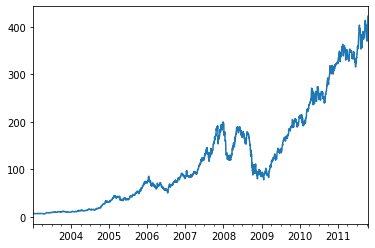

In [152]:
close_px.AAPL.plot()

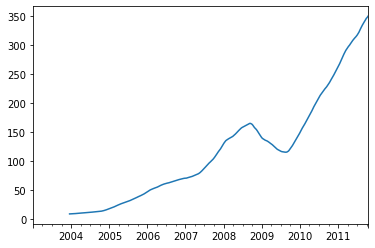

In [153]:
#Preço da Apple com média móvel de 250 dias
close_px.AAPL.rolling(250).mean().plot()

In [154]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

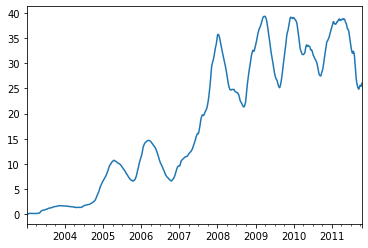

In [155]:
appl_std250.plot()

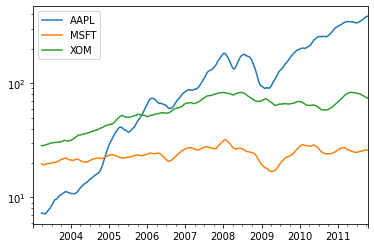

In [157]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [158]:
#Calcular uma média móvel de 20 dias
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


**Funções exponencialmente ponderadas**

In [ ]:
plt.figure()

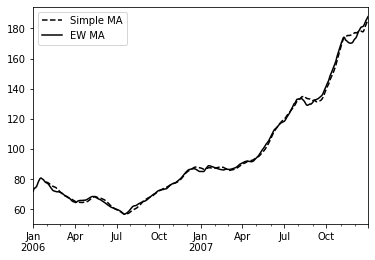

In [167]:
aapl_apx = close_px.AAPL['2006':'2007']
ma60 = aapl_apx.rolling(30, min_periods = 20).mean()
ewma60 = aapl_apx.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label = 'EW MA')
plt.legend()

**Funções de janela móvel binárias**

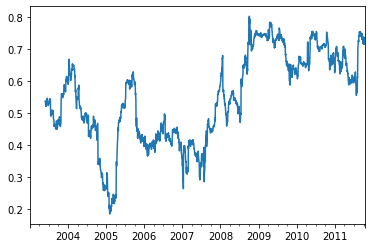

In [170]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

#calculo de correlação entre o retorno de AAPL e o S&P 500 em seis meses
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

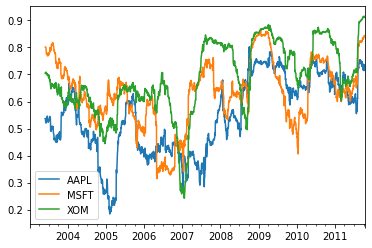

In [171]:
#Correlações de retorno com S&P em seis meses

corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

**Funções de janela móvel definidas pelo usuário**

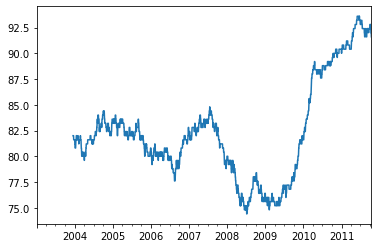

In [173]:
#from scipy.stats import percentileofscore lá em cima
#Classificação de percentil de 2% de retorno da AAPL durante uma janela de um ano
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()